# IU Data Exploration

All images are '.png' images. 

There are 7,470 image files and at first glance, it appears as though there are two images per person, which provides an anterior and lateral view of the person's chest.

There are 3,955 '.xml' files that provide the indication, finding and medical impression of the person in the image. The 'parentImage' tag identifies the corresponding '.png' file.

In [1]:
import os
import pickle
from xml.dom import minidom
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

# Load Captions - Test Case

In [2]:
dict_img_ref={}
docs = minidom.parse('input/ecgen-radiology/1.xml')
img_ref = docs.getElementsByTagName("AbstractText")

for i in img_ref:
    if i.getAttribute("Label") == 'INDICATION': 
        
        if i.firstChild:
            indication=str(i.firstChild.data)
            print(indication)
        else:
            indication="Booop"
            print("Boop")
        
    if i.getAttribute("Label") == 'FINDINGS': 
        findings=str(i.firstChild.data)

img_ref = docs.getElementsByTagName("parentImage")
img_arr=[str(i.getAttribute("id")) for i in img_ref]

print(indication,"\n",findings,"\n",img_arr)

Positive TB test
Positive TB test 
 The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. 
 ['CXR1_1_IM-0001-3001', 'CXR1_1_IM-0001-4001']


# List all the possible labels/indications

There are 2,522 indications unique indications - manual work may be needed to consolidate the labels.

The minimum length is 2 and the maximum length is 228. The median length is 35 characters.

Number of Words:

In [3]:
indic_lst=[]
for filename in os.listdir('input/ecgen-radiology/'):
    docs = minidom.parse('input/ecgen-radiology/'+filename)
    img_ref = docs.getElementsByTagName("AbstractText")
    
    for i in img_ref:
        if i.getAttribute("Label") == 'INDICATION': 
            if i.firstChild:
                indication=str(i.firstChild.data)
                indic_lst.append(indication)
            
indic_lst=list(set(indic_lst))
len(indic_lst)

2522

Median length:  35.0


<AxesSubplot:xlabel='Length Label', ylabel='Count'>

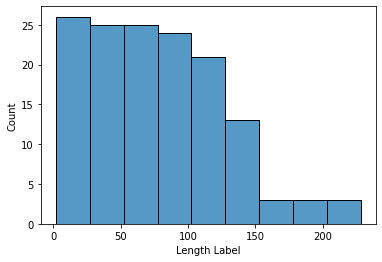

In [4]:
len_labels_lst=[len(i) for i in indic_lst]
print("Median length: ",statistics.median(len_labels_lst))
frequency=collections.Counter(len_labels_lst)
dict_label_freq=dict(frequency)
df_label_freq=pd.DataFrame(dict_label_freq.items(), columns=['Length Label', 'Frequency'])

sns.histplot(data=df_label_freq, x="Length Label")

In [5]:
df_label_freq_sorted=df_label_freq.sort_values(by=['Length Label'])
#df_label_freq_sorted
df_label_freq.describe()

,Length Label,Frequency
count,143.000000,143.000000
mean,77.636364,17.636364
std,50.067355,18.538709
min,2.000000,1.000000
25%,37.500000,2.000000
50%,73.000000,9.000000
75%,110.500000,35.000000
max,228.000000,62.000000


# Distribution of length of the captions

There are 3,425 captions, which is less than the number of files, so there are some files without medical notes. 

The minimum length of the labels is 6, while the maximum length is 1,054. The median length is 207 characters

#Number of words

In [6]:
caption_lst=[]
for filename in os.listdir('input/ecgen-radiology/'):
    docs = minidom.parse('input/ecgen-radiology/'+filename)
    img_ref = docs.getElementsByTagName("AbstractText")
    
    for i in img_ref:
        if i.getAttribute("Label") == 'FINDINGS': 
            if i.firstChild:
                finding=str(i.firstChild.data)
                caption_lst.append(finding)
            
len(caption_lst)

3425

Median length:  207


<AxesSubplot:xlabel='Length Caption', ylabel='Count'>

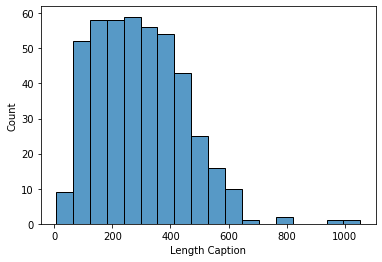

In [7]:
len_cap_lst=[len(i) for i in caption_lst]
print("Median length: ",statistics.median(len_cap_lst))
frequency=collections.Counter(len_cap_lst)
dict_label_freq=dict(frequency)
df_label_freq=pd.DataFrame(dict_label_freq.items(), columns=['Length Caption', 'Frequency'])

sns.histplot(data=df_label_freq, x="Length Caption")

In [8]:
df_caption_freq_sorted=df_label_freq.sort_values(by=['Length Caption'])
#df_caption_freq_sorted
df_caption_freq_sorted.describe()

,Length Caption,Frequency
count,445.000000,445.000000
mean,296.233708,7.696629
std,154.318946,8.355562
min,6.000000,1.000000
25%,173.000000,2.000000
50%,284.000000,5.000000
75%,398.000000,11.000000
max,1054.000000,66.000000


# Image Size (min, max, average)

All the images have 3 channels and the width of all the images is 512 pixels.

Minimum Image size: (362,512,3)

Maximum Image size: (873,512,3)

Average Image size: (533,512,3)

In [17]:
import glob 
import cv2
# Importing and Loading the data into a data frame

img_shape=[]
for file in glob.glob('input/NLMCXR_png/*.png'):
    file_split_1=file.split(".")
    file_split_2=file_split_1[0].split("/")
    img_indx=file_split_2[2]
    
    img=cv2.imread(file)
    img_shape.append((img_indx,img.shape))

In [21]:
h_arr=[]
w_arr=[]
c_arr=[]

for idx,shape in img_shape:
    h_arr.append(shape[0])
    w_arr.append(shape[1])
    c_arr.append(shape[2])
    
print(list(set(w_arr)),"\n",list(set(c_arr)))

[512] 
 [3]


In [22]:
min(h_arr)

362

In [23]:
max(h_arr)

873

In [24]:
sum(h_arr)/len(h_arr)

532.7789825970549